In [1]:
#import libraries & define functions
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

def showImage(window_name, img, wait=0):
    cv2.imshow(window_name, img)
    cv2.waitKey(wait)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [4]:
#video stream
cap = cv2.VideoCapture(0)
# cap.isOpened()
# cap.isRead()
while cap.isOpened():
    success, img = cap.read()
    if not success:
        print("read fail")
        continue
    
    cv2.imshow("cam", img)
    key = cv2.waitKey(5) # if no key is pressed = -1,  esc = 27
    
    if key ==27:
        break
    
cv2.destroyAllWindows()
cv2.waitKey(1)
cap.release()

In [3]:
#annotated image
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

file_name = "hand_example.jpg"
#file_name = "nohand.jpg"
img = cv2.imread(file_name)
img = cv2.flip(img, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#showImage("test",img)

hands = mp_hands.Hands(static_image_mode=True , max_num_hands = 2 , min_detection_confidence=0.5)
result = hands.process(img)

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
annotated_img = img.copy()
for hand_landmarks in result.multi_hand_landmarks:
    mp_drawing.draw_landmarks(annotated_img, hand_landmarks, mp_hands.HAND_CONNECTIONS)

showImage("annotated" , annotated_img)

In [4]:
#annotated video
cap = cv2.VideoCapture(0)
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

while cap.isOpened():
    success, img = cap.read()
    if not success:
        print("read fail")
        continue
    
    
    #flip & bgr->rgb
    img = cv2.flip(img, 1)
    annotated_img = img.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    #hand landmark mapping
    hands = mp_hands.Hands(static_image_mode=True , max_num_hands = 2 , min_detection_confidence=0.5)
    result = hands.process(img)
    
    if (isinstance(result.multi_hand_landmarks, list)):
        for hand_landmarks in result.multi_hand_landmarks:
            mp_drawing.draw_landmarks(annotated_img, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    
    cv2.imshow("cam", annotated_img)

    
    
    key = cv2.waitKey(5) # if no key is pressed = -1,  esc = 27
    
    if key ==27:
        break
    
cv2.destroyAllWindows()
cv2.waitKey(1)
cap.release()

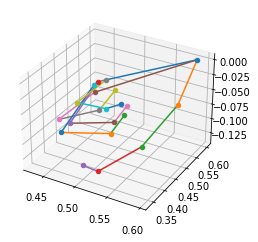

In [3]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

file_name = "hand_example.jpg"
img = cv2.imread(file_name)
img = cv2.flip(img, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#showImage("test",img)

hands = mp_hands.Hands(static_image_mode=True , max_num_hands = 2 , min_detection_confidence=0.5)
result = hands.process(img)

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
annotated_img = img.copy()
for hand_landmarks in result.multi_hand_landmarks:
    mp_drawing.draw_landmarks(annotated_img, hand_landmarks, mp_hands.HAND_CONNECTIONS)



#graph
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
for landmark in hand_landmarks.landmark:
    #print(landmark.x, landmark.y, landmark.z)
    ax.scatter(landmark.x, landmark.y, landmark.z , marker='o')

point1 = [17,0,1,2,3,0,5,6,7,5,9,10,11,9,13,14,15,13,17,18,19]
point2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for p2 in point2:
    landmark_0 = hand_landmarks.landmark[point1[p2]]
    landmark_1 = hand_landmarks.landmark[p2]
    xs = [landmark_0.x, landmark_1.x]
    ys = [landmark_0.y, landmark_1.y]
    zs = [landmark_0.z, landmark_1.z]
    ax.plot(xs, ys, zs)

    
plt.show()